# Python Ninjas - Group Project

# House Prices: Advanced Regression Techniques 

In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Get data and analyse the shape of data

In [485]:
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


# Analyse the data types

In [486]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Analyse the Min, Max and Standard deviation

In [487]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Analyse the first 5 rows of the data

In [488]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Examine numerical features

In [489]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

# Find missing values

In [490]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/train.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFinSF1,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
TotalBsmtSF,0,0.000000
BsmtUnfSF,0,0.000000


# Examine categorical features

In [491]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

# Find missing values

In [492]:
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/train.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


# Find unique values

In [493]:
cat = train.select_dtypes(include=['O'])
cat.apply(pd.Series.nunique)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

# Observations:
1. We'll consider that when more than 15% of the data is missing, we will not consider the variable. This means that we will not try any trick to fill the missing data in these cases. 
2. Also, for some variables, they have very few unique values.

# Finding Correlation coefficients between numeric features and SalePrice

In [494]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

(SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SaleP

# To explore further we will start with the Correlation Heat Map to analyze the data better:
# SalePrice correlation matrix

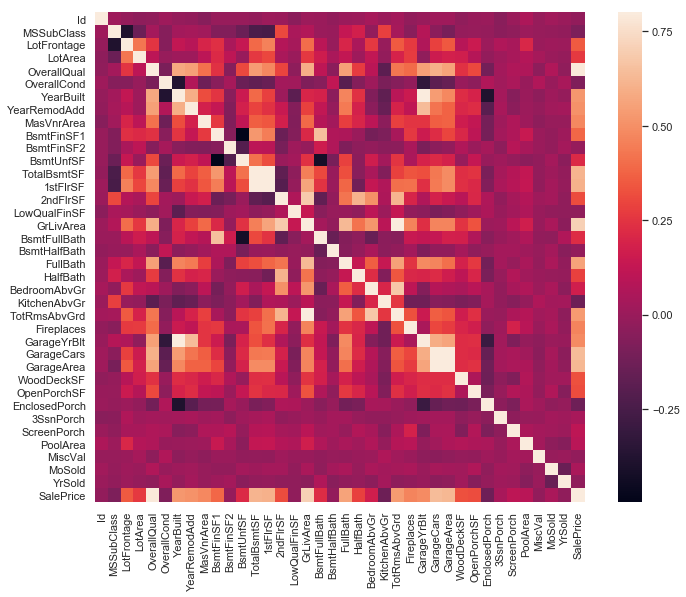

In [495]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# SalePrice correlation matrix - Zoomed HeatMap

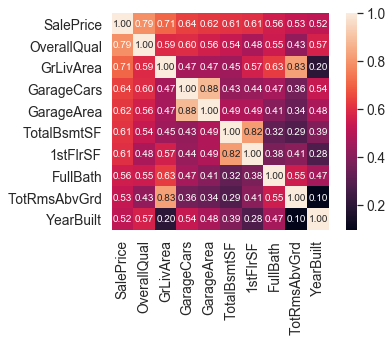

In [496]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Observations:
1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
2. 'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
3. 'TotalBsmtSF' and '1stFloor' also seem to be twins. In this case let us keep 'TotalBsmtSF'
4. 'TotRmsAbvGrd' and 'GrLivArea', twins again.
5. 'YearBuilt' it appears like is slightly correlated with 'SalePrice'.
6. We move ahead with these 6 variables: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'

# Pair Plot between 'SalePrice' and correlated variables

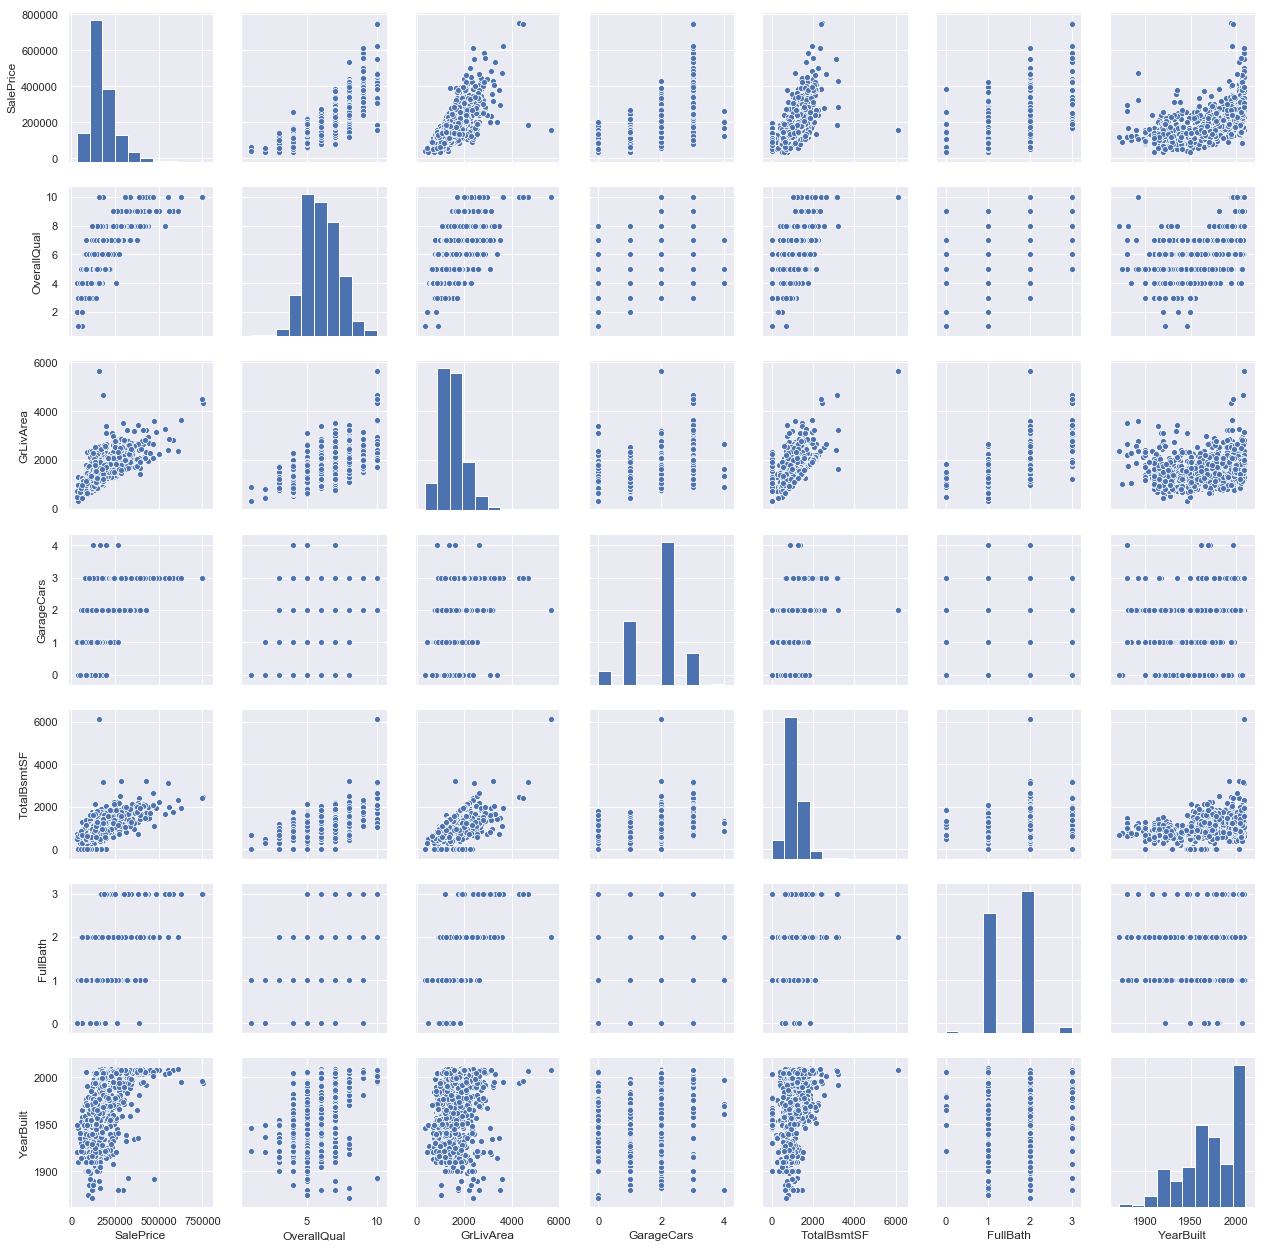

In [497]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Box plot OverallQual/SalePrice

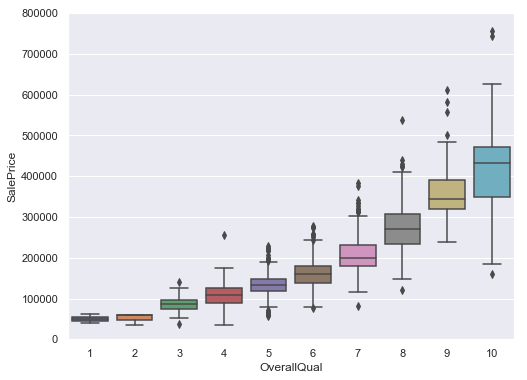

In [498]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# Observations:
1. 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
2. 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
3. One interesting observation is between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.
4. One more interesting observation is between 'SalePrice' and 'YearBuilt'. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function. We can also see this same tendency in the upper limit of the 'dots cloud'

# Looking for outliers

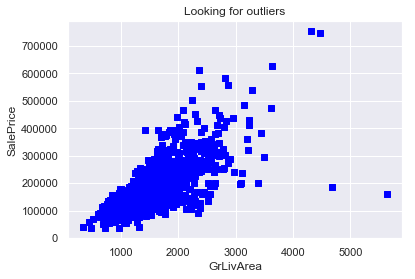

In [499]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We will define them as outliers and delete them.

In [500]:
train = train[train.GrLivArea < 4000] # Remove outliers

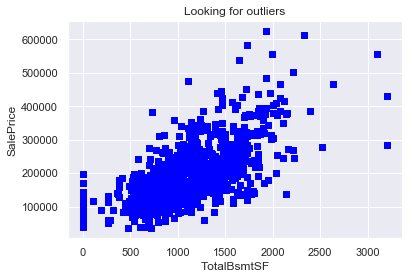

In [501]:
plt.scatter(train.TotalBsmtSF, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but it's not worth it as they are not so far from our set of other values. So we'll not do anything.

# Histogram and normal probability plot
Normality - The data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics).If we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis. Homoscedasticity describes a situation in which the error term is the same across all values of the independent variables. 

Homoscedasticity - refers to the assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

# Histogram and normal probability plot for SalePrice

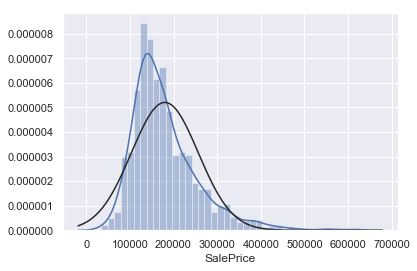

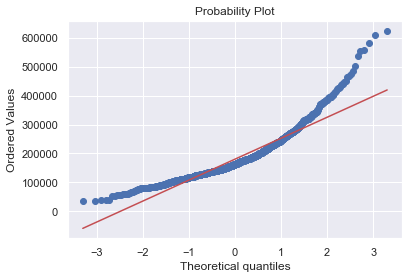

In [502]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

It is apparent that 'SalePrice' doesn't follow normal distribution. It shows peakedness, positive skewness and does not follow the diagonal line, so before performing any regression analysis it has to be transformed. 

In [503]:
train['SalePrice'] = np.log(train['SalePrice'])

# Transformed histogram and normal probability plot for SalePrice

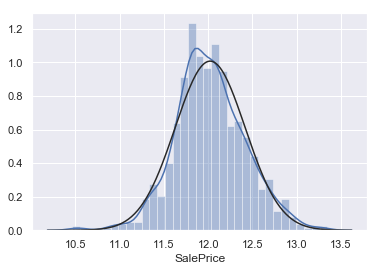

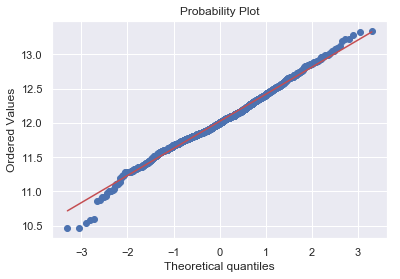

In [504]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

We repeat the same steps for the rest of the variables.

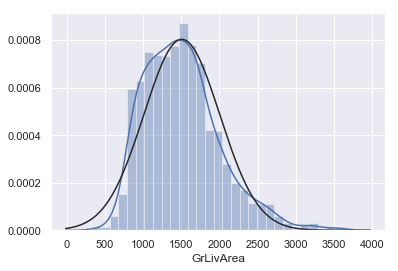

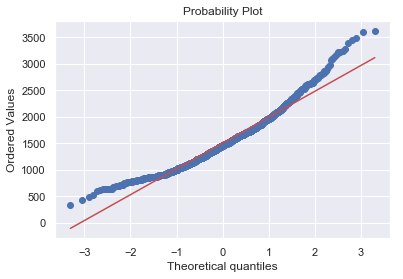

In [505]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [506]:
train['GrLivArea'] = np.log(train['GrLivArea'])

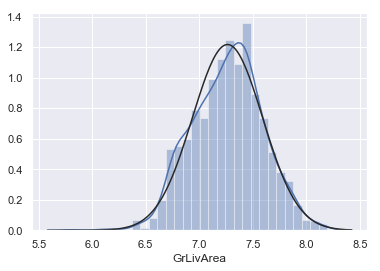

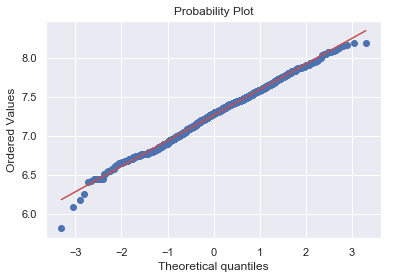

In [507]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

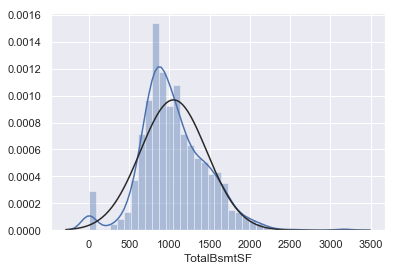

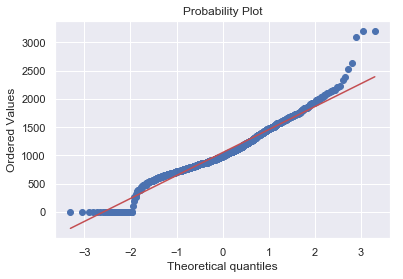

In [508]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

We observe that 'TotalBsmtSF' presents skewness. A significant number of observations with value zero (houses without basement). The value zero doesn't allow us to do log transformations. To apply a log transformation here, we'll replace the zero values with the average of 'TotalBsmtSF'. This way we can transform data, without losing the effect of having or no basement.

In [509]:
train['TotalBsmtSF'] = train['TotalBsmtSF'].replace(0,np.average(train['TotalBsmtSF']))

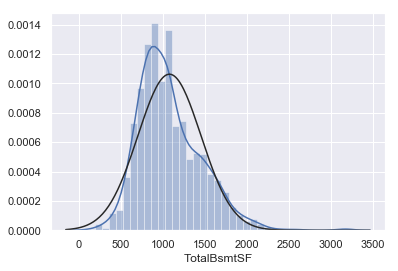

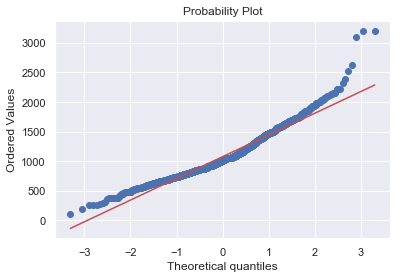

In [510]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [511]:
train['TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

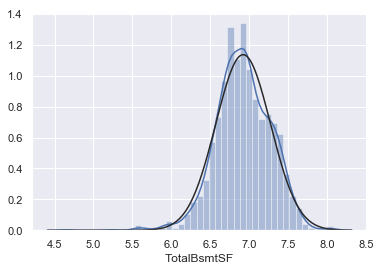

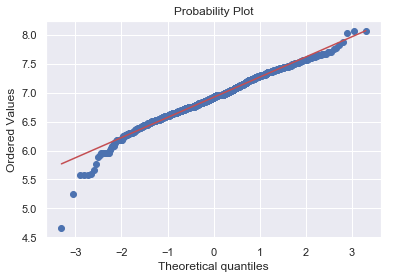

In [512]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

# Multiple Linear Regression in SKLearn

We will try fitting a linear regression model with more than one independent variables. We will use Hold Out Method for Cross Validation. Hold Out Method involves removing a part of the training data and using it to get predictions from the model trained on rest of the data. We split our data into training and test sets. The test set will be 20% of the whole data set. We have imported the LinearRegression class. We will instantiate it, and call the fit() method along with our training data.

# Preparing the Data

In [513]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
x = train[cols] # independent variables
y = train['SalePrice'] # dependent variable

In [514]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

# Training the Algorithm

In [515]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [516]:
pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])  

,Coefficient
OverallQual,0.104992
GrLivArea,0.452306
GarageCars,0.067000
TotalBsmtSF,0.180247
FullBath,-0.035093
YearBuilt,0.002490


# Observations:
We can see that 'YearBuilt' have very little effect on 'SalePrice'.

In [517]:
print('Intercept: {:.3f}'
     .format(linreg.intercept_))
print('R^2 training is: {:.3f}'
     .format(linreg.score(x_train, y_train)))
print('R^2 test is: {:.3f}'
     .format(linreg.score(x_test, y_test)))

Intercept: 1.874
R^2 training is: 0.832
R^2 test is: 0.853


# Make Predictions
We are checking how model is performing on our own data(x_test)

In [518]:
y_train_predict = linreg.predict(x_train)
y_test_predict = linreg.predict(x_test)

Compare the actual output values x_test with the predicted values y_test

In [519]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})  

,Actual,Predicted
1291,11.691072,11.711979
1144,11.289782,11.421397
903,12.388394,12.428938
746,12.371587,12.381735
6,12.634603,12.470122
43,11.777211,11.677972
1159,12.128111,12.118642
241,11.612771,11.443745
841,11.967181,11.690913
59,11.735269,11.553823


# Plot predictions - Real values

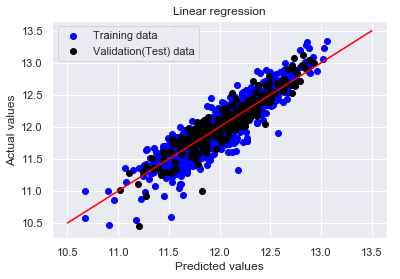

In [520]:
plt.scatter(y_train_predict, y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_predict, y_test, c = "black",  label = "Validation(Test) data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Evaluating the Algorithm

In [521]:
mse_train = mean_squared_error(y_train, y_train_predict)
print('RMSE train is: {:.3f}'
     .format(np.sqrt(mse_train)))
mse_test = mean_squared_error(y_test, y_test_predict)
print('RMSE test is: {:.3f}'
     .format(np.sqrt(mse_test)))

RMSE train is: 0.162
RMSE test is: 0.153


# Observations:
The value of root mean squared error is low. This means that our algorithm can make reasonably good predictions. But we still need to check with other algorithms as well to confirm which one works the best for our data.

# Ridge Regression

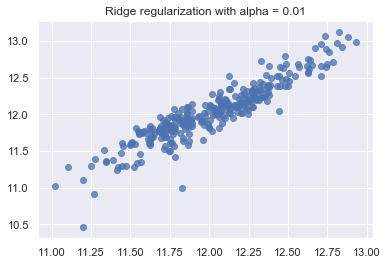

('R^2 training is:', 0.831760292493266)
('R^2 test is:', 0.8531716794456846)
('RMSE is:', 0.023482346035745644)


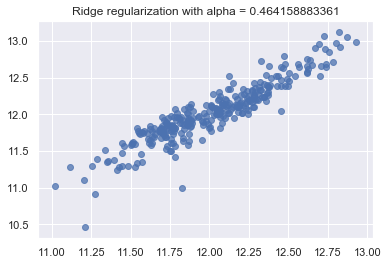

('R^2 training is:', 0.8316091903740074)
('R^2 test is:', 0.8526901073022743)
('RMSE is:', 0.02355936417277835)


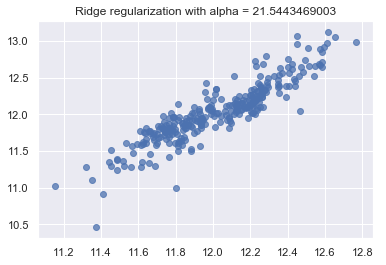

('R^2 training is:', 0.7734632802524785)
('R^2 test is:', 0.7859539085877998)
('RMSE is:', 0.034232526580461546)


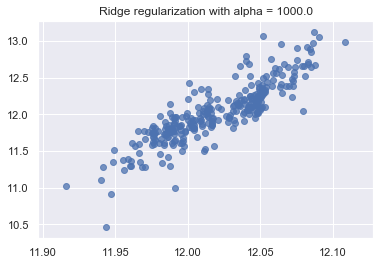

('R^2 training is:', 0.14488028083848892)
('R^2 test is:', 0.14600351776187825)
('RMSE is:', 0.1365801967462175)


In [522]:
actual_values = y_test
scaler = MinMaxScaler()

for i in np.linspace(-2, 3, 4):
    alpha = 10**i
    rm = linear_model.Ridge(alpha = alpha)
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    ridge_model  = rm.fit(x_train_scaled, y_train)
    preds_ridge = ridge_model.predict(x_test_scaled)
    plt.scatter(preds_ridge, actual_values, alpha = 0.75, color = 'b')
    plt.title('Ridge regularization with alpha = {}'.format(alpha))
    plt.show()
    print("R^2 training is:",ridge_model.score(x_train_scaled, y_train))
    print("R^2 test is:",ridge_model.score(x_test_scaled, y_test))
    print("RMSE is:",mean_squared_error(y_test, preds_ridge))

# Lasso Regression

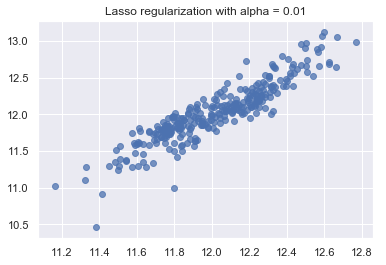

('R^2 training is:', 0.7693882382817343)
('R^2 test is:', 0.792656825206177)
('RMSE is:', 0.033160524892454385)


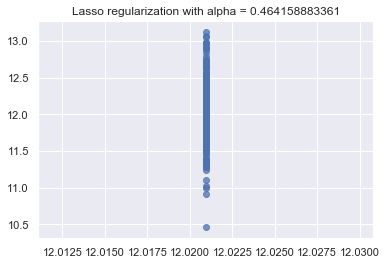

('R^2 training is:', 0.0)
('R^2 test is:', -0.00015884853864789328)
('RMSE is:', 0.1599560362975709)


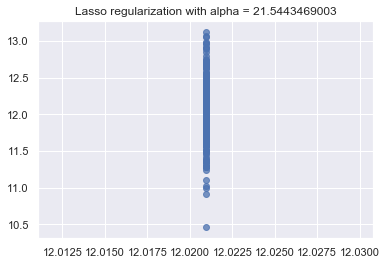

('R^2 training is:', 0.0)
('R^2 test is:', -0.00015884853864789328)
('RMSE is:', 0.1599560362975709)


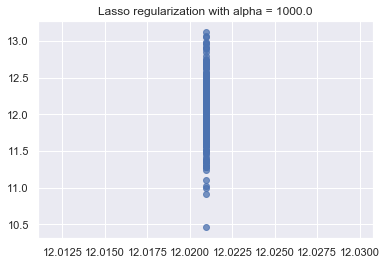

('R^2 training is:', 0.0)
('R^2 test is:', -0.00015884853864789328)
('RMSE is:', 0.1599560362975709)


In [523]:
for i in np.linspace(-2, 3, 4):
    alpha = 10**i
    rm = Lasso(alpha = alpha)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    lasso_model = rm.fit(x_train_scaled, y_train)
    preds_lasso = lasso_model.predict(x_test_scaled)
    plt.scatter(preds_lasso, actual_values, alpha = 0.75, color = 'b')
    plt.title('Lasso regularization with alpha = {}'.format(alpha))
    plt.show()
    print("R^2 training is:",lasso_model.score(x_train_scaled, y_train))
    print("R^2 test is:",lasso_model.score(x_test_scaled, y_test))
    print("RMSE is:",mean_squared_error(y_test, preds_lasso))

# Elastic Net Regression

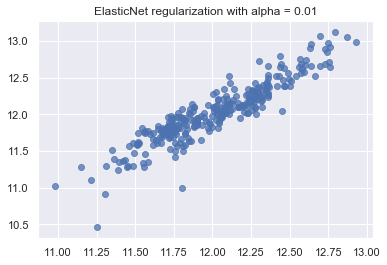

('R^2  training is:', 0.8263354635593753)
('R^2 test is:', 0.8452228582440496)
('RMSE is:', 0.1599560362975709)


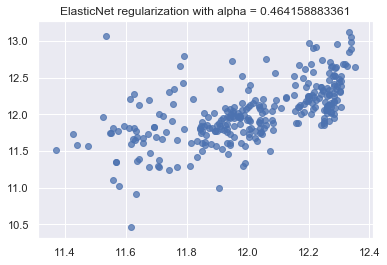

('R^2  training is:', 0.41269459708325607)
('R^2 test is:', 0.3826377528280444)
('RMSE is:', 0.1599560362975709)


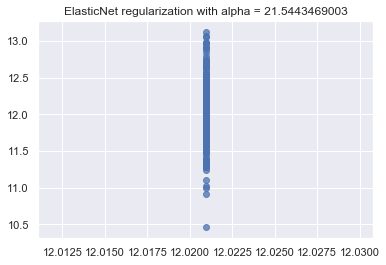

('R^2  training is:', 0.0)
('R^2 test is:', -0.00015884853864789328)
('RMSE is:', 0.1599560362975709)


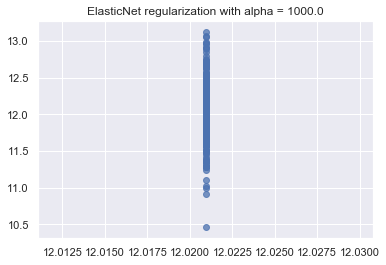

('R^2  training is:', 0.0)
('R^2 test is:', -0.00015884853864789328)
('RMSE is:', 0.1599560362975709)


In [530]:
for i in np.linspace(-2, 3, 4):
    alpha = 10**i
    rm = ElasticNet(alpha = alpha)
    ElasticNet_model = rm.fit(x_train, y_train)
    preds_ElasticNet = ElasticNet_model.predict(x_test)
    plt.scatter(preds_ElasticNet, actual_values, alpha = 0.75, color = 'b')
    plt.title('ElasticNet regularization with alpha = {}'.format(alpha))
    plt.show()
    print("R^2  training is:",ElasticNet_model.score(x_train, y_train))
    print("R^2 test is:",ElasticNet_model.score(x_test, y_test))
    print("RMSE is:",mean_squared_error(y_test, preds_lasso))

# Observation:
Based on higher R^2 value and low RMSE value ,we will use Ridge Regression model with alpha as 0.01

# Final sales price prediction with best ML Model

In [531]:
test_df = pd.read_csv('test.csv')

In [532]:
test_df['GrLivArea'] = np.log(test_df['GrLivArea'])
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].replace(0,np.average(test_df['TotalBsmtSF']))
test_df['TotalBsmtSF'] = np.log(test_df['TotalBsmtSF'])

In [534]:
x = test_df[cols]

X_TEST = x.fillna(0)

rm1 = linear_model.Ridge(alpha = 0.01)
final_model = rm1.fit(x_train, y_train)
final_predictions = final_model.predict(X_TEST)

my_submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': np.exp(final_predictions)})
my_submission.head()

my_submission.to_csv('submission.csv', index=False)